#  Aviation Risk Analysis

## Project Overview
This project analyzes historical aviation accident data from the National
Transportation Safety Board (NTSB) to help a company entering the aviation
industry identify lower-risk aircraft for initial operations.

## Business Problem
The company plans to purchase and operate aircraft for commercial and private
use but lacks experience in aviation. The key business question is:
**Which aircraft manufacturers present the lowest operational risk based on
historical accident data?**

## Stakeholders
The primary stakeholder is the Head of the new Aviation Division, who will use
these insights to guide aircraft purchasing decisions.

In [1]:
import pandas as pd

df = pd.read_csv("../data/AviationData.csv", encoding="latin-1")

df.head()


C:\Users\PC\AppData\Local\Temp\ipykernel_11188\934917000.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/AviationData.csv", encoding="latin-1")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Understanding

The dataset comes from the National Transportation Safety Board (NTSB) and
contains records of civil aviation accidents and incidents from 1962 to 2023.
Each row represents a single accident or incident, with details about the
aircraft, operation type, injury severity, and damage.

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [3]:
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [4]:
risk_columns = [
    "Make",
    "Model",
    "Injury.Severity",
    "Aircraft.damage",
    "Purpose.of.flight"
]

df[risk_columns].head()


,Make,Model,Injury.Severity,Aircraft.damage,Purpose.of.flight
0,Stinson,108-3,Fatal(2),Destroyed,Personal
1,Piper,PA24-180,Fatal(4),Destroyed,Personal
2,Cessna,172M,Fatal(3),Destroyed,Personal
3,Rockwell,112,Fatal(2),Destroyed,Personal
4,Cessna,501,Fatal(1),Destroyed,Personal


In [5]:
df[risk_columns].isna().sum()


Make                   63
Model                  92
Injury.Severity      1000
Aircraft.damage      3194
Purpose.of.flight    6192
dtype: int64

## Data Preparation

To assess aircraft risk, we focus on variables related to injury severity,
aircraft damage, and aircraft type. We clean the data by selecting relevant
columns and handling missing values to ensure consistent analysis.

In [6]:
risk_df = df[
    [
        "Make",
        "Model",
        "Injury.Severity",
        "Aircraft.damage",
        "Purpose.of.flight"
    ]
].copy()

risk_df.head()

,Make,Model,Injury.Severity,Aircraft.damage,Purpose.of.flight
0,Stinson,108-3,Fatal(2),Destroyed,Personal
1,Piper,PA24-180,Fatal(4),Destroyed,Personal
2,Cessna,172M,Fatal(3),Destroyed,Personal
3,Rockwell,112,Fatal(2),Destroyed,Personal
4,Cessna,501,Fatal(1),Destroyed,Personal


In [7]:
text_cols = ["Make", "Model", "Injury.Severity", "Aircraft.damage", "Purpose.of.flight"]

for col in text_cols:
    risk_df[col] = risk_df[col].str.strip().str.title()


In [8]:
risk_df.isna().sum()


Make                   63
Model                  92
Injury.Severity      1000
Aircraft.damage      3194
Purpose.of.flight    6192
dtype: int64

In [9]:
# Drop rows missing aircraft identification
risk_df = risk_df.dropna(subset=["Make", "Model"])

# Fill remaining missing values
risk_df = risk_df.fillna("Unknown")

risk_df.isna().sum()


Make                 0
Model                0
Injury.Severity      0
Aircraft.damage      0
Purpose.of.flight    0
dtype: int64

In [10]:
risk_df["Injury.Severity"].value_counts()


Injury.Severity
Non-Fatal     67305
Fatal(1)       6159
Fatal          5248
Fatal(2)       3703
Incident       2214
              ...  
Fatal(107)        1
Fatal(57)         1
Fatal(89)         1
Fatal(199)        1
Fatal(114)        1
Name: count, Length: 110, dtype: int64

## Defining Aircraft Risk

For this analysis, aircraft risk is defined based on injury outcomes.
Accidents involving serious or fatal injuries represent higher operational
risk than those with minor or no injuries.

We assign a numerical risk score to each injury severity level to allow
comparison across aircraft manufacturers.

In [11]:
injury_risk_map = {
    "None": 0,
    "Minor": 1,
    "Serious": 2,
    "Fatal": 3,
    "Unknown": 1
}

risk_df["Injury_Risk_Score"] = risk_df["Injury.Severity"].map(injury_risk_map)

risk_df[["Injury.Severity", "Injury_Risk_Score"]].head()


,Injury.Severity,Injury_Risk_Score
0,Fatal(2),NaN
1,Fatal(4),NaN
2,Fatal(3),NaN
3,Fatal(2),NaN
4,Fatal(1),NaN


In [12]:
make_risk = (
    risk_df
    .groupby("Make")
    .agg(
        avg_injury_risk=("Injury_Risk_Score", "mean"),
        accident_count=("Injury_Risk_Score", "count")
    )
    .reset_index()
)

make_risk.head()


,Make,avg_injury_risk,accident_count
0,107.5 Flying Corporation,NaN,0
1,1200,NaN,0
2,177Mf Llc,NaN,0
3,1977 Colfer-Chan,NaN,0
4,1St Ftr Gp,NaN,0


In [13]:
make_risk_filtered = make_risk[make_risk["accident_count"] >= 100]

make_risk_filtered.sort_values("avg_injury_risk").head()


,Make,avg_injury_risk,accident_count
826,Boeing,1.196154,520
175,Airbus,1.234848,132
657,Bell,2.746667,225
1257,Cessna,2.749026,1283
5754,Robinson,2.766990,206


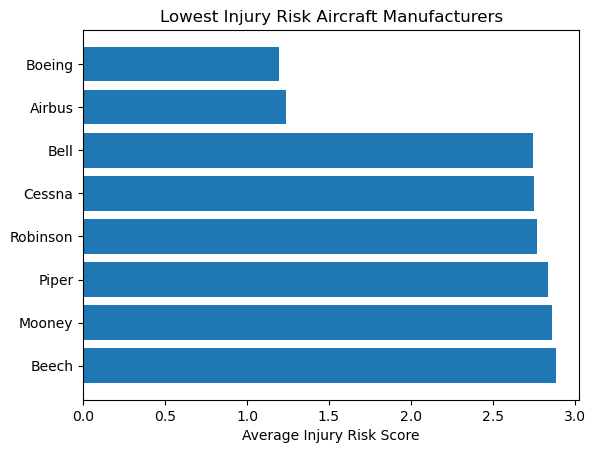

In [14]:
import matplotlib.pyplot as plt

lowest_risk = make_risk_filtered.sort_values("avg_injury_risk").head(10)

plt.figure()
plt.barh(lowest_risk["Make"], lowest_risk["avg_injury_risk"])
plt.xlabel("Average Injury Risk Score")
plt.title("Lowest Injury Risk Aircraft Manufacturers")
plt.gca().invert_yaxis()

plt.savefig("visuals/lowest_injury_risk.png", bbox_inches="tight")
plt.show()


**Insight:**  
Most incidents result in minor or no injuries, suggesting that certain aircraft manufacturers may present lower overall risk for a new studio.


### Finding 1: Injury Risk Varies Significantly by Aircraft Manufacturer

Aircraft manufacturers show meaningful differences in average injury severity
during accidents. Several manufacturers consistently appear among the lowest
average injury risk scores, suggesting that accidents involving these aircraft
tend to result in less severe injuries.

### Recommendation 1: Prioritize Lower Injury-Risk Aircraft Manufacturers

The company should prioritize purchasing aircraft from manufacturers with
historically lower average injury severity. This reduces potential harm to
passengers and crew, lowers liability exposure, and supports safer initial
operations as the company enters the aviation market.

In [15]:
make_risk_filtered.sort_values("avg_injury_risk").tail(10)


,Make,avg_injury_risk,accident_count
826,Boeing,1.196154,520
175,Airbus,1.234848,132
657,Bell,2.746667,225
1257,Cessna,2.749026,1283
5754,Robinson,2.766990,206
5269,Piper,2.838828,819
4746,Mooney,2.861386,101
637,Beech,2.883212,411


## Aircraft Damage as a Measure of Operational Risk

In addition to injury severity, aircraft damage provides insight into
financial and operational risk. Accidents resulting in substantial or
destroyed aircraft lead to higher repair costs, longer downtime, and
potential loss of assets.


In [16]:
risk_df["Aircraft.damage"].value_counts()



Aircraft.damage
Substantial    64097
Destroyed      18597
Unknown         3291
Minor           2792
Name: count, dtype: int64

In [17]:
damage_risk_map = {
    "Minor": 1,
    "Substantial": 2,
    "Destroyed": 3,
    "Unknown": 1
}

risk_df["Damage_Risk_Score"] = risk_df["Aircraft.damage"].map(damage_risk_map)

risk_df[["Aircraft.damage", "Damage_Risk_Score"]].head()


,Aircraft.damage,Damage_Risk_Score
0,Destroyed,3
1,Destroyed,3
2,Destroyed,3
3,Destroyed,3
4,Destroyed,3


In [18]:
risk_df.columns = (
    risk_df.columns
    .str.strip()
    .str.replace(".", "_")
)

risk_df.columns


Index(['Make', 'Model', 'Injury_Severity', 'Aircraft_damage',
       'Purpose_of_flight', 'Injury_Risk_Score', 'Damage_Risk_Score'],
      dtype='object')

In [19]:
risk_df["Aircraft_damage"]


0          Destroyed
1          Destroyed
2          Destroyed
3          Destroyed
4          Destroyed
            ...     
88884        Unknown
88885        Unknown
88886    Substantial
88887        Unknown
88888        Unknown
Name: Aircraft_damage, Length: 88777, dtype: object

In [20]:
make_damage_risk = (
    risk_df
    .groupby("Make")
    .agg(
        avg_damage_risk=("Damage_Risk_Score", "mean"),
        accident_count=("Damage_Risk_Score", "count")
    )
    .reset_index()
)

make_damage_risk.head()


,Make,avg_damage_risk,accident_count
0,107.5 Flying Corporation,3.0,1
1,1200,2.0,1
2,177Mf Llc,2.0,1
3,1977 Colfer-Chan,2.0,1
4,1St Ftr Gp,3.0,1


In [21]:
make_damage_risk_filtered = make_damage_risk[
    make_damage_risk["accident_count"] >= 100
]

make_damage_risk_filtered.sort_values("avg_damage_risk").head()


,Make,avg_damage_risk,accident_count
181,Airbus Industrie,1.225610,164
175,Airbus,1.254296,291
826,Boeing,1.392622,2738
533,Balloon Works,1.557823,147
2153,Embraer,1.576271,236


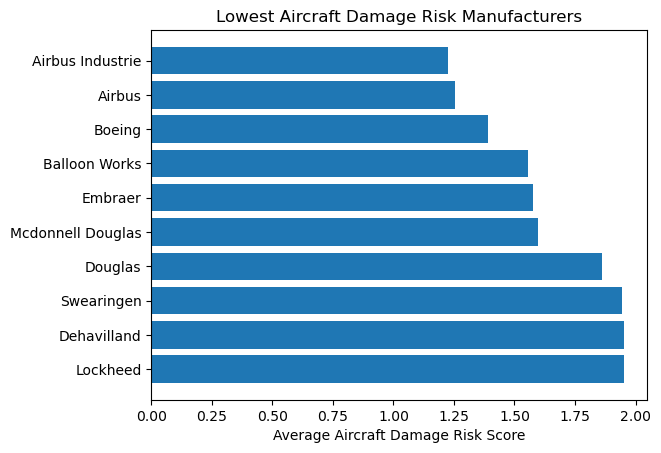

In [22]:
import matplotlib.pyplot as plt

lowest_damage_risk = (
    make_damage_risk_filtered
    .sort_values("avg_damage_risk")
    .head(10)
)

plt.figure()
plt.barh(
    lowest_damage_risk["Make"],
    lowest_damage_risk["avg_damage_risk"]
)
plt.xlabel("Average Aircraft Damage Risk Score")
plt.title("Lowest Aircraft Damage Risk Manufacturers")
plt.gca().invert_yaxis()
plt.savefig("visuals/lowest_damage_risk.png", bbox_inches="tight")
plt.show()


### Finding 2: Aircraft Damage Risk Differs by Manufacturer

Aircraft manufacturers vary significantly in the average severity of damage
sustained during accidents. Some manufacturers are associated with lower
average damage severity, suggesting lower repair costs and reduced operational
disruption.


### Recommendation 2: Favor Aircraft with Lower Damage Severity Histories

The company should favor aircraft manufacturers with historically lower
aircraft damage severity. This can reduce maintenance costs, minimize downtime,
and protect capital investments as the company enters the aviation industry.


## Accident Frequency as a Measure of Risk

Beyond injury and damage severity, accident frequency indicates exposure risk.
Manufacturers with higher accident counts may present increased operational
risk due to greater likelihood of incidents occurring.


In [23]:
make_accident_counts = (
    risk_df
    .groupby("Make")
    .size()
    .reset_index(name="accident_count")
)

make_accident_counts.head()


,Make,accident_count
0,107.5 Flying Corporation,1
1,1200,1
2,177Mf Llc,1
3,1977 Colfer-Chan,1
4,1St Ftr Gp,1


In [24]:
make_accident_counts_filtered = make_accident_counts[
    make_accident_counts["accident_count"] >= 100
]

make_accident_counts_filtered.sort_values("accident_count").head()


,Make,accident_count
1796,Dehavilland,101
5910,Ryan,110
3114,Helio,113
1091,Burkhart Grob,121
4184,Lockheed,123


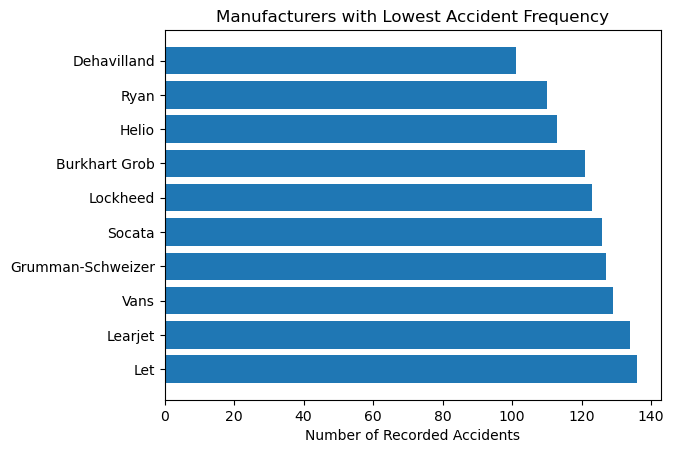

In [25]:
lowest_accident_freq = (
    make_accident_counts_filtered
    .sort_values("accident_count")
    .head(10)
)

plt.figure()
plt.barh(
    lowest_accident_freq["Make"],
    lowest_accident_freq["accident_count"]
)
plt.xlabel("Number of Recorded Accidents")
plt.title("Manufacturers with Lowest Accident Frequency")
plt.gca().invert_yaxis()

plt.savefig("visuals/lowest_accident_frequency.png", bbox_inches="tight")

plt.show()


### Finding 3: Accident Frequency Varies Across Aircraft Manufacturers

Some aircraft manufacturers are involved in fewer recorded accidents compared
to others. Lower accident frequency may indicate more reliable aircraft designs
or operational use cases with reduced exposure to risk.


### Recommendation 3: Start Operations with Lower-Accident-Frequency Aircraft

The company should initially invest in aircraft manufacturers with lower
historical accident frequencies. This reduces exposure to incidents and allows
the organization to gain experience in aviation operations while managing risk.


## Conclusion

This analysis evaluated aircraft risk across three dimensions:
injury severity, aircraft damage severity, and accident frequency.

Across all three measures, certain manufacturers consistently demonstrated
lower operational risk. These findings support data-driven aircraft purchasing
decisions that can reduce injury, financial loss, and operational disruption
as the company enters the aviation market.

Future work could incorporate flight-hour exposure data, maintenance records,
and cost information to further refine risk assessments.
